Import Libraries

In [253]:
import pandas as pd
import numpy as np
import os
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns


Config

In [254]:
folder_path = "revenue-data" #"expenditure-investment-data" or "revenue-data"
taxes_or_expenditure = "Taxes" #set type = "Taxes" or "Expenditure"
unweighted_or_aggregated = "aggregated" #set unweighted_or_aggregate = "unweighted" or "aggregated"
graphs = [ #each row is over time graph
  ['Revenue', 'Grants', 'Other revenue'],
  ['Taxes on income, profits, & capital gains', 'Taxes on goods & services', 'Taxes on int trade & transactions', 'Other taxes n.e.c.'],
  ['Property income', 'Sales of goods & services', 'Other transfers'],
  ['Taxes on income, profits, & capital gains: individuals', 'Taxes on income, profits, & capital gains: corporations', 'General taxes on goods & services', 'Excise taxes']
]

# graphs = [
#   ['Net/gross investment in nonfinancial assets', 'Compensation of employees', 'Use of goods and services', 'Interest', 'Subsidies', 'Grants'],
#   ['Net lending (+) / Net borrowing (-)', 'Interest'],
#   ['Net/gross investment in nonfinancial assets', 'Interest']
# ]

Currency Codes

In [255]:
country_currency_codes_table = {
    'Burundi': 'BIF',
    'Benin': 'XOF',
    'Burkina Faso': 'XOF',
    'Central African Republic': 'XAF',
    "Côte d'Ivoire": 'XOF',
    'Cameroon': 'XAF',
    'Democratic Republic of the Congo': 'CDF',
    'Republic of Congo': 'XAF',
    'Comoros': 'KMF',
    'Eritrea': 'ERN',
    'Ethiopia': 'ETB',
    'Ghana': 'GHS',
    'Guinea': 'GNF',
    'The Gambia': 'GMD',
    'Guinea-Bissau': 'XOF',
    'Liberia': 'LRD',
    'Madagascar': 'MGA',
    'Mali': 'XOF',
    'Mozambique': 'MZN',
    'Mauritania': 'MRU',
    'Malawi': 'MWK',
    'Niger': 'XOF',
    'Rwanda': 'RWF',
    'Sudan': 'SDG',
    'Senegal': 'XOF',
    'Sierra Leone': 'SLL',
    'Somalia': 'SOS',
    'Sao Tomee and Principe': 'STN',
    'Chad': 'XAF',
    'Togo': 'XOF',
    'Tanzania': 'TZS',
    'Uganda': 'UGX',
    'Zambia': 'ZMW'
}


Read Data

In [256]:
#read in stata dataset as dataframe "country_code_df"
country_code_df = pd.read_stata("codesffactors_Mar23_2019.dta") 
country_code_df.replace('--', np.nan, inplace=True) #replace all entries that are '--' with NaN data value

country_code_df.head()

,countryname,wbctry,wbcode,wbregion,wbigroup2017,wblcat2017,hipc,emu,cemac,waemu,imfcode,imfweocode,imfweoiso,imfweoctry,region
0,Aruba,Aruba,ABW,Latin America & Caribbean,High income,NaN,0,0,0,0,NaN,314.0,ABW,Aruba,LAC
1,Afghanistan,Afghanistan,AFG,South Asia,Low income,IDA,1,0,0,0,512.0,512.0,AFG,Afghanistan,SAS
2,Angola,Angola,AGO,Sub-Saharan Africa,Lower middle income,IBRD,0,0,0,0,614.0,614.0,AGO,Angola,SSA
3,Anguilla,NaN,AIA,Latin America & Caribbean,NaN,NaN,0,0,0,0,312.0,NaN,NaN,NaN,LAC
4,Albania,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD,0,0,0,0,914.0,914.0,ALB,Albania,ECA


In [257]:
region_classification_ls = country_code_df['wbregion'].unique() #get a list of region classifications
income_classification_ls = country_code_df['wbigroup2017'].unique() #get a list of income classifications
income_classification_ls = [x for x in income_classification_ls if not pd.isna(x)] # remove '--' from income_classification_ls

print(f"The region classifications are: {', '.join(country for country in region_classification_ls)}")
print(f"The income classifications are: {', '.join(country for country in income_classification_ls)}")

The region classifications are: Latin America & Caribbean, South Asia, Sub-Saharan Africa, Europe & Central Asia, Middle East & North Africa, East Asia & Pacific, North America
The income classifications are: High income, Low income, Lower middle income, Upper middle income


In [258]:
ssa_hipc_countries = country_code_df[(country_code_df['hipc'] == 1) & (country_code_df['wbregion'] == 'Sub-Saharan Africa')]
ssa_hipc_countries_ls = ssa_hipc_countries['imfweoctry'].to_list()

ssa_hipc_countries_ls

['Burundi',
 'Benin',
 'Burkina Faso',
 'Central African Republic',
 "Côte d'Ivoire",
 'Cameroon',
 'Democratic Republic of the Congo',
 'Republic of Congo',
 'Comoros',
 'Eritrea',
 'Ethiopia',
 'Ghana',
 'Guinea',
 'The Gambia',
 'Guinea-Bissau',
 'Liberia',
 'Madagascar',
 'Mali',
 'Mozambique',
 'Mauritania',
 'Malawi',
 'Niger',
 'Rwanda',
 'Sudan',
 'Senegal',
 'Sierra Leone',
 'Somalia',
 'São Tomé and Príncipe',
 'Chad',
 'Togo',
 'Tanzania',
 'Uganda',
 'Zambia']

Read in IMF's Government Finance Statistics

In [259]:
master_table = {}

# Loop that goes through all files 'file_name' in the folder 'folder_path'
for file_name in os.listdir(folder_path):
  if file_name.endswith('.xlsx') and not file_name.startswith('~$'): #check to see if is spreadsheet .xlsx format
    raw_df = pd.read_excel(folder_path+ "/" + file_name) #read in .xlsx as dataframe
    master_table[file_name[:-5]] = raw_df #store dataframe as an entry in the master_table hash table

master_table["Togo"]
# for key in master_table:
#   print(master_table[key])

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Detailed Revenue Breakdown,Detailed Revenue Breakdown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country: Togo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sector: Budgetary central government,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unit: Domestic currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Scale: Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2010,2011.00,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,2018.000000,2019.000000
7,Revenue,359.243964,401.23,398.596316,479.559000,496.763876,562.356688,604.225592,610.311564,710.794350,746.915731
8,Taxes,246.773948,291.44,314.027022,359.872000,415.629808,468.507362,498.921783,484.332771,502.083773,556.531390
9,"Taxes on income, profits, & capital gains",35.970043,41.38,41.515238,57.880885,59.051105,98.003532,75.992924,86.185978,101.125915,119.292328


Filtering

In [260]:
#REMOVE "JUNK" ROWS AND CONVERT TO CORRECT SCALE (MILLION/BILLIONS)
for key in master_table: #loop through table (where key is the country name) (master_table[key] is the dataframe stored in the master_table indexed by key)
  scale = master_table[key].iloc[4,0] #get if values have scale of billions or millions
  
  # Drop rows 0 to 5, reformatting indexes and column headers
  master_table[key] = master_table[key].drop([0, 1, 2, 3, 4, 5])
  if taxes_or_expenditure == "Expenditure":
    master_table[key] = master_table[key].drop([11])
  master_table[key] = master_table[key].reset_index(drop=True) 
  master_table[key].columns = master_table[key].iloc[0]
  master_table[key] = master_table[key][1:]
  master_table[key] = master_table[key].set_index(master_table[key].columns[0])
  master_table[key].columns = [int(float(col)) for col in master_table[key].columns]
  # master_table[key] = master_table[key].fillna(0)

  if unweighted_or_aggregated == "aggregated":
    if scale == "Scale: Billions":
      master_table[key] = master_table[key]* (10 ** 9) #multiple every value in dataframe by 1e9 if scale is billion
    elif scale == "Scale: Millions":
      master_table[key] = master_table[key]* (10 ** 6) #multiple every value in dataframe by 1e9 if scale is billion


#FILTER OUT YEAR COLUMNS ACCOUNTING DOESNT ADD UP
#first level: make sure 'Taxes', 'Social Contributions', 'Grants, 'Other Revenue' Sums to 'Revenue'
#second level: make sure 'Taxes on income, profits, & capital gains', 'Taxes on payroll & workforce', 'Taxes on property', 'Taxes on goods & services', 'Taxes on int trade & transactions', 'Other taxes n.e.c.' sum to 'Taxes'
if taxes_or_expenditure == "Expenditure":
  first_level_ls = ['Compensation of employees', 'Use of goods and services', 'Consumption of fixed capital', 'Interest', 'Subsidies', 'Grants', 'Social benefits', 'Other expense', 'Net/gross investment in nonfinancial assets']
else:
  first_level_ls = ['Taxes', 'Social contributions', 'Grants', 'Other revenue']
  second_level_ls = ['Taxes on income, profits, & capital gains', 'Taxes on payroll & workforce', 'Taxes on property', 'Taxes on goods & services', 'Taxes on int trade & transactions', 'Other taxes n.e.c.']
                  
for key in master_table:
  years_accounting_error_ls = []
  years_available = master_table[key].columns
  for year in years_available:
    country_year_df = master_table[key][year]
    first_level_total = 0 
    second_level_total = 0
    for category in first_level_ls:
      if category in country_year_df.index:
        first_level_total += country_year_df[category]
      # else: 
      #   print(category)
    if taxes_or_expenditure == "Taxes":
      for category in second_level_ls:
        if category in country_year_df.index:
          second_level_total += country_year_df[category]
    # if round(taxes, 0) != round(country_year_df['Taxes'], 0) or round(revenue, 0) != round(country_year_df['Revenue'], 0):
    
    margin = 0.001
    if taxes_or_expenditure == "Taxes":
      lower_bound_taxes = country_year_df['Taxes'] - country_year_df['Taxes']*margin
      upper_bound_taxes = country_year_df['Taxes'] + country_year_df['Taxes']*margin
      lower_bound_revenue = country_year_df['Revenue'] - country_year_df['Revenue']*margin
      upper_bound_revenue = country_year_df['Revenue'] + country_year_df['Revenue']*margin

      if second_level_total < lower_bound_taxes or second_level_total > upper_bound_taxes or first_level_total < lower_bound_revenue or first_level_total > upper_bound_revenue:
        print(f"{round(first_level_total, 0)}, {round(country_year_df['Taxes'], 0)}, {round(first_level_total, 0)}, {round(country_year_df['Revenue'], 0)}")
        years_accounting_error_ls.append(year)

    elif taxes_or_expenditure == "Expenditure":
      lower_bound_exp = country_year_df['Expenditure'] - country_year_df['Expenditure']*margin
      upper_bound_exp = country_year_df['Expenditure'] + country_year_df['Expenditure']*margin
      if first_level_total < lower_bound_exp or first_level_total > upper_bound_exp:
        print(f"{round(first_level_total, 0)}, {round(country_year_df['exp'], 0)}")
        years_accounting_error_ls.append(year)
  
  print(key)
  print(years_accounting_error_ls)
  master_table[key].drop(columns=years_accounting_error_ls, inplace=True)
 
    
    

#FILTER OUT COUNTRIES WITH LESS THAN 7 YEARS OF DATA
less_than_seven_years_data_countries = [] #create list to store countries with less than 7 years of historial data
for key in master_table: #iterate through master_table
  num_columns = master_table[key].shape[1] #count the number of columns (each column represents a year)
  if num_columns < 7: #if less than 7 columns/year, add to list to delete
    less_than_seven_years_data_countries.append(key)

print('remove')
for country in less_than_seven_years_data_countries:
  print(country)
  del master_table[country] #delete countries with less than 7 years from data table

Benin
[]
Senegal
[]
Côte d'Ivoire
[]
Burkina Faso
[]
Central African Republic
[]
Somalia
[]
Tanzania
[]
Democratic Republic of the Congo
[]
Rwanda
[]
Republic of Congo
[]
Sudan
[]
604225591780.0, 498921783147.0, 604225591780.0, 604225591780.0
Togo
[2016]
Mali
[]
Malawi
[]
Sao Tomee and Principe
[]
Mozambique
[]
Sierra Leone
[]
Guinea-Bissau
[]
Burundi
[]
Liberia
[]
Cameroon
[]
Madagascar
[]
remove
Benin
Somalia
Guinea-Bissau
Liberia


Convert Currency

In [261]:
print('keep')
for key in master_table:
  print(key)

#CONVERT LOCAL CURRENCY DENOMINATED VALUES TO USD
if unweighted_or_aggregated == "aggregated":
  error_countries = []
  for key in master_table:
    #get annual 2010-2019 USD to domestic currency exchange rate using yfinance library
    currency = country_currency_codes_table[key] #retrieve currency symbol from 'country_currency_codes_table'
    symbol = f"{currency}=X"
    try:
      data = yf.download(symbol, start="2010-01-01", end="2020-01-01", interval="1mo") #download monthly USD-Currency dataset from 2010-2020
      yearly_data_df = data['Close'].resample('YE').mean() #get the annual average exchange rate outputted as datafram
      yearly_data_table = yearly_data_df.to_dict() # Convert the yearly_data to a hash table with the date as the key
      year_to_exchange_rate_dict = {key.year: value for key, value in yearly_data_table.items()} # Convert the keys to only the year part
      print(year_to_exchange_rate_dict)

      #convert DataFrame values to USD
      for year in master_table[key].columns: #loop through columns in dataframe
        year_int = int(year)  # Convert year to integer to match the dictionary keys
        master_table[key][year] = master_table[key][year] / year_to_exchange_rate_dict[year_int] #divide each column's values by that year's exchange rate

    except Exception as e: #if errored out
      print(f"Could not fetch rate for {key} ({currency}): {e}")
      error_countries.append(key) #add country to error list
      pass
      
  for country in error_countries:
    del master_table[country] #delete countries where currency conversion failed
  
  for key in master_table:
    print(key)
    print(master_table[key])

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

keep
Senegal
Côte d'Ivoire
Burkina Faso
Central African Republic
Tanzania
Democratic Republic of the Congo
Rwanda
Republic of Congo
Sudan
Togo
Mali
Malawi
Sao Tomee and Principe
Mozambique
Sierra Leone
Burundi
Cameroon
Madagascar
{2010: 487.61083221435547, 2011: 460.5933329264323, 2012: 501.0466715494792, 2013: 492.91916910807294, 2014: 497.47583770751953, 2015: 594.4266713460287, 2016: 594.0358378092448, 2017: 577.82666015625, 2018: 557.75, 2019: 583.7949981689453}
{2010: 487.61083221435547, 2011: 460.5933329264323, 2012: 501.0466715494792, 2013: 492.91916910807294, 2014: 497.47583770751953, 2015: 594.4266713460287, 2016: 594.0358378092448, 2017: 577.82666015625, 2018: 557.75, 2019: 583.7949981689453}
{2010: 487.61083221435547, 2011: 460.5933329264323, 2012: 501.0466715494792, 2013: 492.91916910807294, 2014: 497.47583770751953, 2015: 594.4266713460287, 2016: 594.0358378092448, 2017: 577.82666015625, 2018: 557.75, 2019: 583.7949981689453}
{2010: 487.5991668701172, 2011: 460.5908304850


[*********************100%%**********************]  1 of 1 completed

{2010: 487.61083221435547, 2011: 460.5933329264323, 2012: 501.0466715494792, 2013: 492.91916910807294, 2014: 497.47583770751953, 2015: 594.4266713460287, 2016: 594.0358378092448, 2017: 577.82666015625, 2018: 557.75, 2019: 583.7949981689453}



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['STN=X']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be one of ['1d', '5d']")
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


{2010: 148.9291674296061, 2011: 155.58916854858398, 2012: 247.6258316040039, 2013: 362.4624989827474, 2014: 410.5541687011719, 2015: 495.21583557128906, 2016: 700.3816680908203, 2017: 720.1374969482422, 2018: 704.3308308919271, 2019: 718.8183339436849}
Could not fetch rate for Sao Tomee and Principe (STN): Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'
{2010: 34.550000508626304, 2011: 28.579166730244953, 2012: 28.048333326975506, 2013: 29.664999802907307, 2014: 31.18499978383382, 2015: 39.24833265940348, 2016: 62.973334312438965, 2017: 62.673333168029785, 2018: 59.819166819254555, 2019: 61.90666675567627}
{2010: 3920.0, 2011: 4280.166666666667, 2012: 4277.166666666667, 2013: 4268.166666666667, 2014: 4302.333333333333, 2015: 4348.583333333333, 2016: 5087.916666666667, 2017: 7505.0, 2018: 7962.916666666667, 2019: 9048.333333333334}
{2010: 1206.0750122070312, 2011: 1216.6916605631511, 2012: 1396.4749857584636, 2013: 1531.5916748046875, 2014: 1

Convert to Percentage (if unweighted)

In [262]:
if unweighted_or_aggregated == "unweighted":
  for key in master_table: #iterate through master_table
    total = master_table[key].loc[taxes_or_expenditure]
    master_table[key] = master_table[key] / total * 100 #take all values as a fraction of total expenditure, then convert decimal to percent, then round to two decimal places

master_table['Togo']

,2010,2011,2012,2013,2014,2015,2017,2018,2019
nan,,,,,,,,,
Revenue,736743198.51261,8.711155e+08,7.955273e+08,9.728958e+08,9.985689e+08,9.460489e+08,1.056219e+09,1.274396e+09,1.279414e+09
Taxes,506087912.953741,6.327491e+08,6.267421e+08,7.300832e+08,8.354774e+08,7.881668e+08,8.381973e+08,9.001950e+08,9.532993e+08
"Taxes on income, profits, & capital gains",73767933.252532,8.984064e+07,8.285703e+07,1.174247e+08,1.187015e+08,1.648707e+08,1.491554e+08,1.813105e+08,2.043394e+08
"Taxes on income, profits, & capital gains: individuals",33654452.788666,3.043900e+07,3.451774e+07,4.414428e+07,3.947811e+07,4.117792e+07,5.367003e+07,6.112129e+07,6.228808e+07
"Taxes on income, profits, & capital gains: corporations",27552681.766704,4.203274e+07,4.208992e+07,6.423788e+07,7.922334e+07,1.236928e+08,9.548539e+07,1.201892e+08,1.420513e+08
"Taxes on income, profits, & capital gains: other",12560798.697162,1.736890e+07,6.249371e+06,9.042548e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Taxes on payroll & workforce,7591946.346206,8.358784e+06,8.742325e+06,6.928437e+06,7.595918e+06,4.538783e+06,4.196416e+06,4.277100e+06,2.851712e+06
Taxes on property,1558161.510789,1.802023e+06,1.006687e+06,9.511907e+05,8.510404e+06,2.906044e+06,5.776655e+06,2.181520e+06,1.373985e+07
Taxes on goods & services,264233121.353957,3.380422e+08,3.375073e+08,3.606737e+08,4.459064e+08,4.352701e+08,4.973163e+08,5.081827e+08,5.231269e+08


Calculate Yearly Averages

In [263]:
data_by_year_table = {
  2010: [],
  2011: [],
  2012: [],
  2013: [],
  2014: [],
  2015: [],
  2016: [],
  2017: [],
  2018: [],
  2019: [],
} #make table that stores data by year

# master_averages_ls = [] #make master averages list as place to store averages

for key in master_table:
  years_available = master_table[key].columns
  for year in data_by_year_table:
    if year in years_available:
      data_by_year_table[year].append(master_table[key][year])

yearly_averages_ls = [] #make a list of the yearly averages
for year in data_by_year_table:
  merged_year_df = pd.concat(data_by_year_table[year], axis=1, join='outer')
  #SUM OR MEAN?
  if unweighted_or_aggregated == "aggregated":
    year_average_df = merged_year_df.sum(axis=1) #get the average of all the countries' averages
  elif unweighted_or_aggregated == "unweighted":
    year_average_df = merged_year_df.mean(axis=1) #get the average of all the countries' averages
  yearly_averages_ls.append(year_average_df)

 
# #Get average over decade
# #loop through table (where key is the country name) (master_table[key] is the dataframe stored in the master_table indexed by key)
# for key in master_table:
#   per_category_average = master_table[key].mean(axis=1) #get the average of each category (ignoring np.NaN values) into a list
#   # per_category_average.drop('To other government units', inplace=True) #drop 'To other government units' since there's two rows named that and will error
#   master_averages_ls.append(per_category_average) #add each country average to to the master averages list



# merged_averages_df = pd.concat(master_averages_ls, axis=1, join='outer')
# average__of_averages_df = merged_averages_df.mean(axis=1) #get the average of all the countries' averages
# average__of_averages_df

for i in range(len(yearly_averages_ls)):
  print(f"YEAR: {2010+i}")
  print(yearly_averages_ls[i])

YEAR: 2010
nan
Revenue                                                    46135090696.262459
Taxes                                                      24310248856.894337
Taxes on income, profits, & capital gains                   6283109201.590809
Taxes on income, profits, & capital gains: individuals      2493307325.573338
Taxes on income, profits, & capital gains: corporations     2114773377.788073
Taxes on income, profits, & capital gains: other             254810688.188532
Taxes on payroll & workforce                                  58219502.201636
Taxes on property                                             66431403.604901
Taxes on goods & services                                  11103540077.400969
General taxes on goods & services                           6304097265.801343
Excise taxes                                                 2084328524.40197
Taxes on int trade & transactions                           5521210711.698543
Other taxes n.e.c.                               

Calculate Percentages (if aggregated)

In [264]:
if unweighted_or_aggregated == "aggregated":

  yearly_averages_percentage_ls = []

  year = 2010
  for year_average_df in yearly_averages_ls:


    total = year_average_df[taxes_or_expenditure]
    year_average_percentage_df = year_average_df / total * 100 #take all values as a fraction of total expenditure, then convert decimal to percent, then round to two decimal places
    
    first_level = 0
    print(year)
    for category in first_level_ls:
      first_level += year_average_percentage_df[category]
    print(first_level)
    # print(year_average_percentage_df['Revenue'])
    year += 1
    
    yearly_averages_percentage_ls.append(year_average_percentage_df)

  yearly_averages_ls = yearly_averages_percentage_ls
  for i in range(len(yearly_averages_percentage_ls)):
    print(f"YEAR: {2010+i}")
    print(yearly_averages_percentage_ls[i])

2010
189.7610052819344
2011
181.30495027887218
2012
153.54965990986204
2013
156.90822389140436
2014
145.71874944685314
2015
134.68815060670084
2016
125.67801862579306
2017
125.73483346597047
2018
130.9673469681708
2019
130.4326051357895
YEAR: 2010
nan
Revenue                                                     189.7763
Taxes                                                          100.0
Taxes on income, profits, & capital gains                  25.845516
Taxes on income, profits, & capital gains: individuals     10.256198
Taxes on income, profits, & capital gains: corporations     8.699102
Taxes on income, profits, & capital gains: other            1.048162
Taxes on payroll & workforce                                0.239485
Taxes on property                                           0.273265
Taxes on goods & services                                  45.674317
General taxes on goods & services                           25.93185
Excise taxes                                              

Calculate Average Across Period

In [265]:
merged_percentages_df = pd.concat(yearly_averages_ls, axis=1, join='outer')
average_df = merged_percentages_df.mean(axis=1)
rounded_average_df = average_df.apply(lambda x: round(x, 2))

rounded_average_df = rounded_average_df.to_frame()

In [266]:
#check
first_level = 0
for category in first_level_ls:
  first_level += average_df[category]
print(first_level)

# second_level = 0
# for category in second_level_ls:
#   second_level += average_df[category]
# print(second_level)

147.47435436113508


In [267]:
rounded_by_year_average_df = merged_percentages_df.round(2)
# rounded_by_year_average_df.iloc[:, 5:]
rounded_by_year_average_df.columns = [str(int(col) + 2010) for col in rounded_by_year_average_df.columns]

Plot over time

In [268]:

def graph(rows_to_plot):
    # sns.set(style="whitegrid")

    # Plotting
    plt.figure(figsize=(10, 6))
    for row in rows_to_plot:
        sns.lineplot(x=rounded_by_year_average_df.columns, y=rounded_by_year_average_df.loc[row], marker='o', label=row)

    # Add labels and title
    plt.xlabel('Year', fontsize=12)
    if taxes_or_expenditure == "Tax":
        plt.ylabel('Percentage of Tax Revenue', fontsize=12)
    elif taxes_or_expenditure == "Expenditure":
        plt.ylabel('Percentage of Expenditure', fontsize=12)

    # plt.title('Percentage of Tax Revenue Over Time')

    # Customize the legend
    plt.legend(title='Category', title_fontsize='12', fontsize='10', loc='upper right')

    # Customize the ticks and grid
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, linestyle='--', linewidth=0.5)

    # Adjust y-axis limits to be 120% of the original range
    y_min, y_max = plt.ylim()
    y_range = y_max - y_min
    plt.ylim(y_min, y_max + 0.25 * y_range)

    # Show the plot
    plt.tight_layout()
    plt.show()

Output

In [269]:
rounded_average_df

,0
nan,
Revenue,148.35
Taxes,100.00
"Taxes on income, profits, & capital gains",30.10
"Taxes on income, profits, & capital gains: individuals",11.99
"Taxes on income, profits, & capital gains: corporations",13.23
"Taxes on income, profits, & capital gains: other",1.40
Taxes on payroll & workforce,0.42
Taxes on property,0.67
Taxes on goods & services,48.23


In [270]:
rounded_by_year_average_df

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
nan,,,,,,,,,,
Revenue,189.7763,181.32,153.563077,165.66,145.72,134.69,125.68,125.73,130.97,130.43
Taxes,100.0,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00
"Taxes on income, profits, & capital gains",25.845516,27.98,28.667918,29.70,30.69,29.70,28.05,32.29,33.49,34.54
"Taxes on income, profits, & capital gains: individuals",10.256198,10.94,10.527234,10.29,11.65,12.23,12.48,14.10,14.37,13.05
"Taxes on income, profits, & capital gains: corporations",8.699102,9.34,11.610167,12.72,13.84,13.12,11.75,15.68,16.55,18.97
"Taxes on income, profits, & capital gains: other",1.048162,1.02,1.375989,1.65,2.10,1.55,0.66,1.65,1.68,1.31
Taxes on payroll & workforce,0.239485,0.20,0.427611,0.33,0.40,0.40,0.47,0.66,0.55,0.55
Taxes on property,0.273265,0.36,0.255108,0.28,0.45,0.85,0.90,1.07,1.16,1.08
Taxes on goods & services,45.674317,47.87,47.710955,47.41,47.74,50.47,52.91,48.04,47.97,46.55


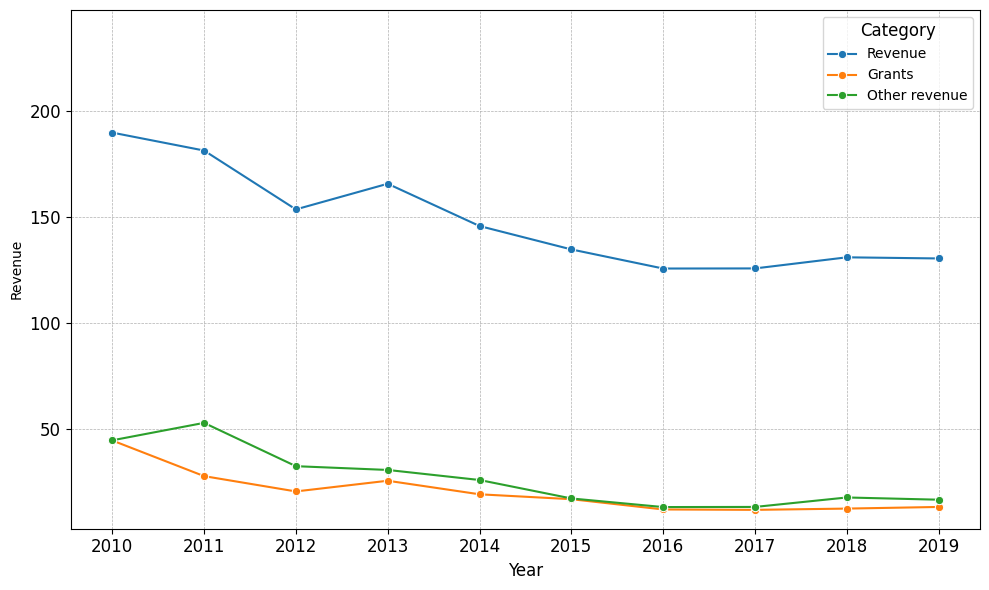

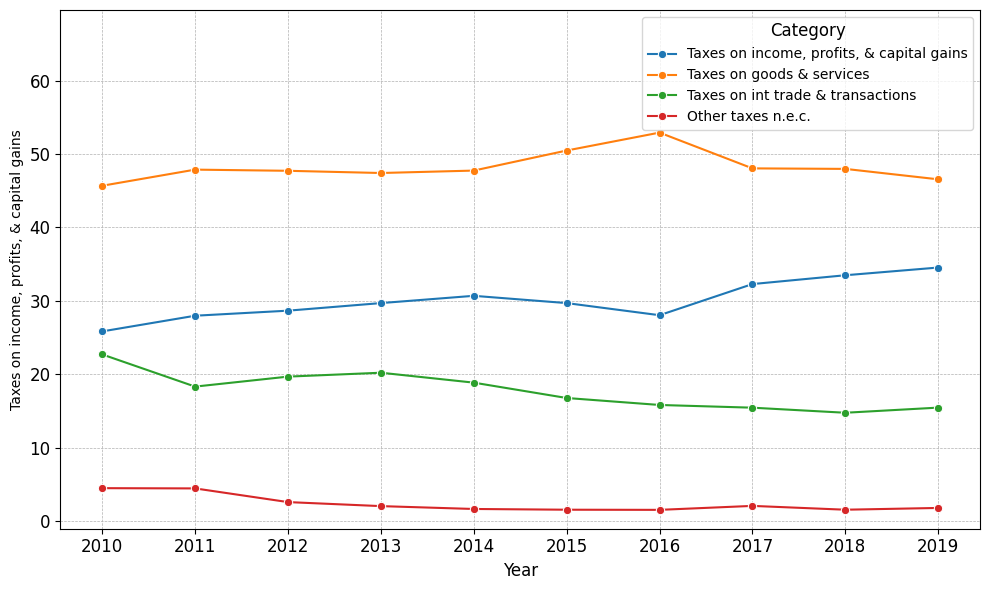

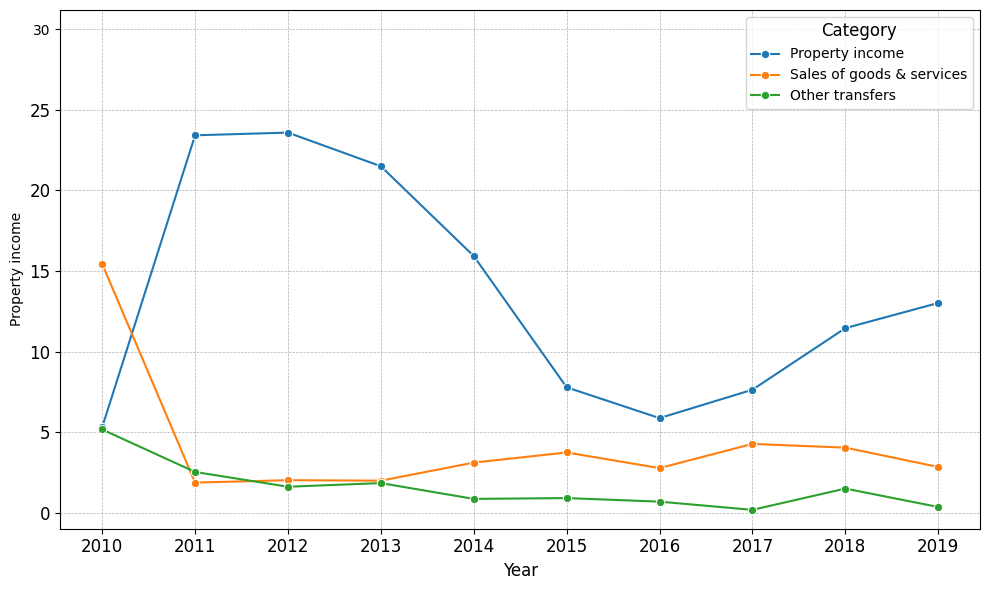

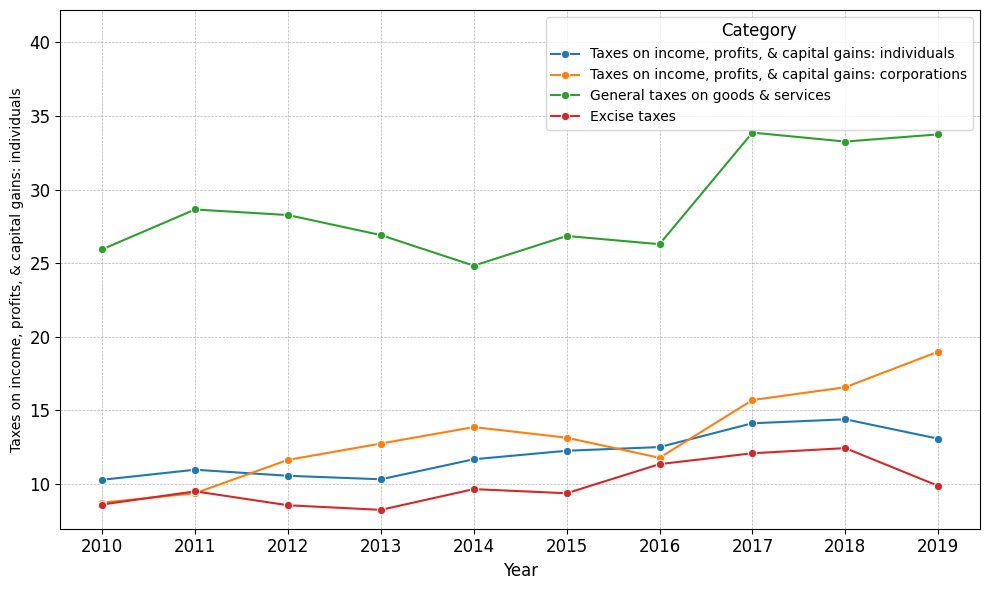

In [271]:
for graph_ls in graphs:
  graph(graph_ls)